In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('health_data.csv')

In [3]:
import pandas as pd

# Assuming your original DataFrame is df
df_redundant = pd.concat([df, df.sample(frac=0.1)])  # Duplicate 10% of the data

# Shuffle the DataFrame to mix original and duplicated rows
df_redundant = df_redundant.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

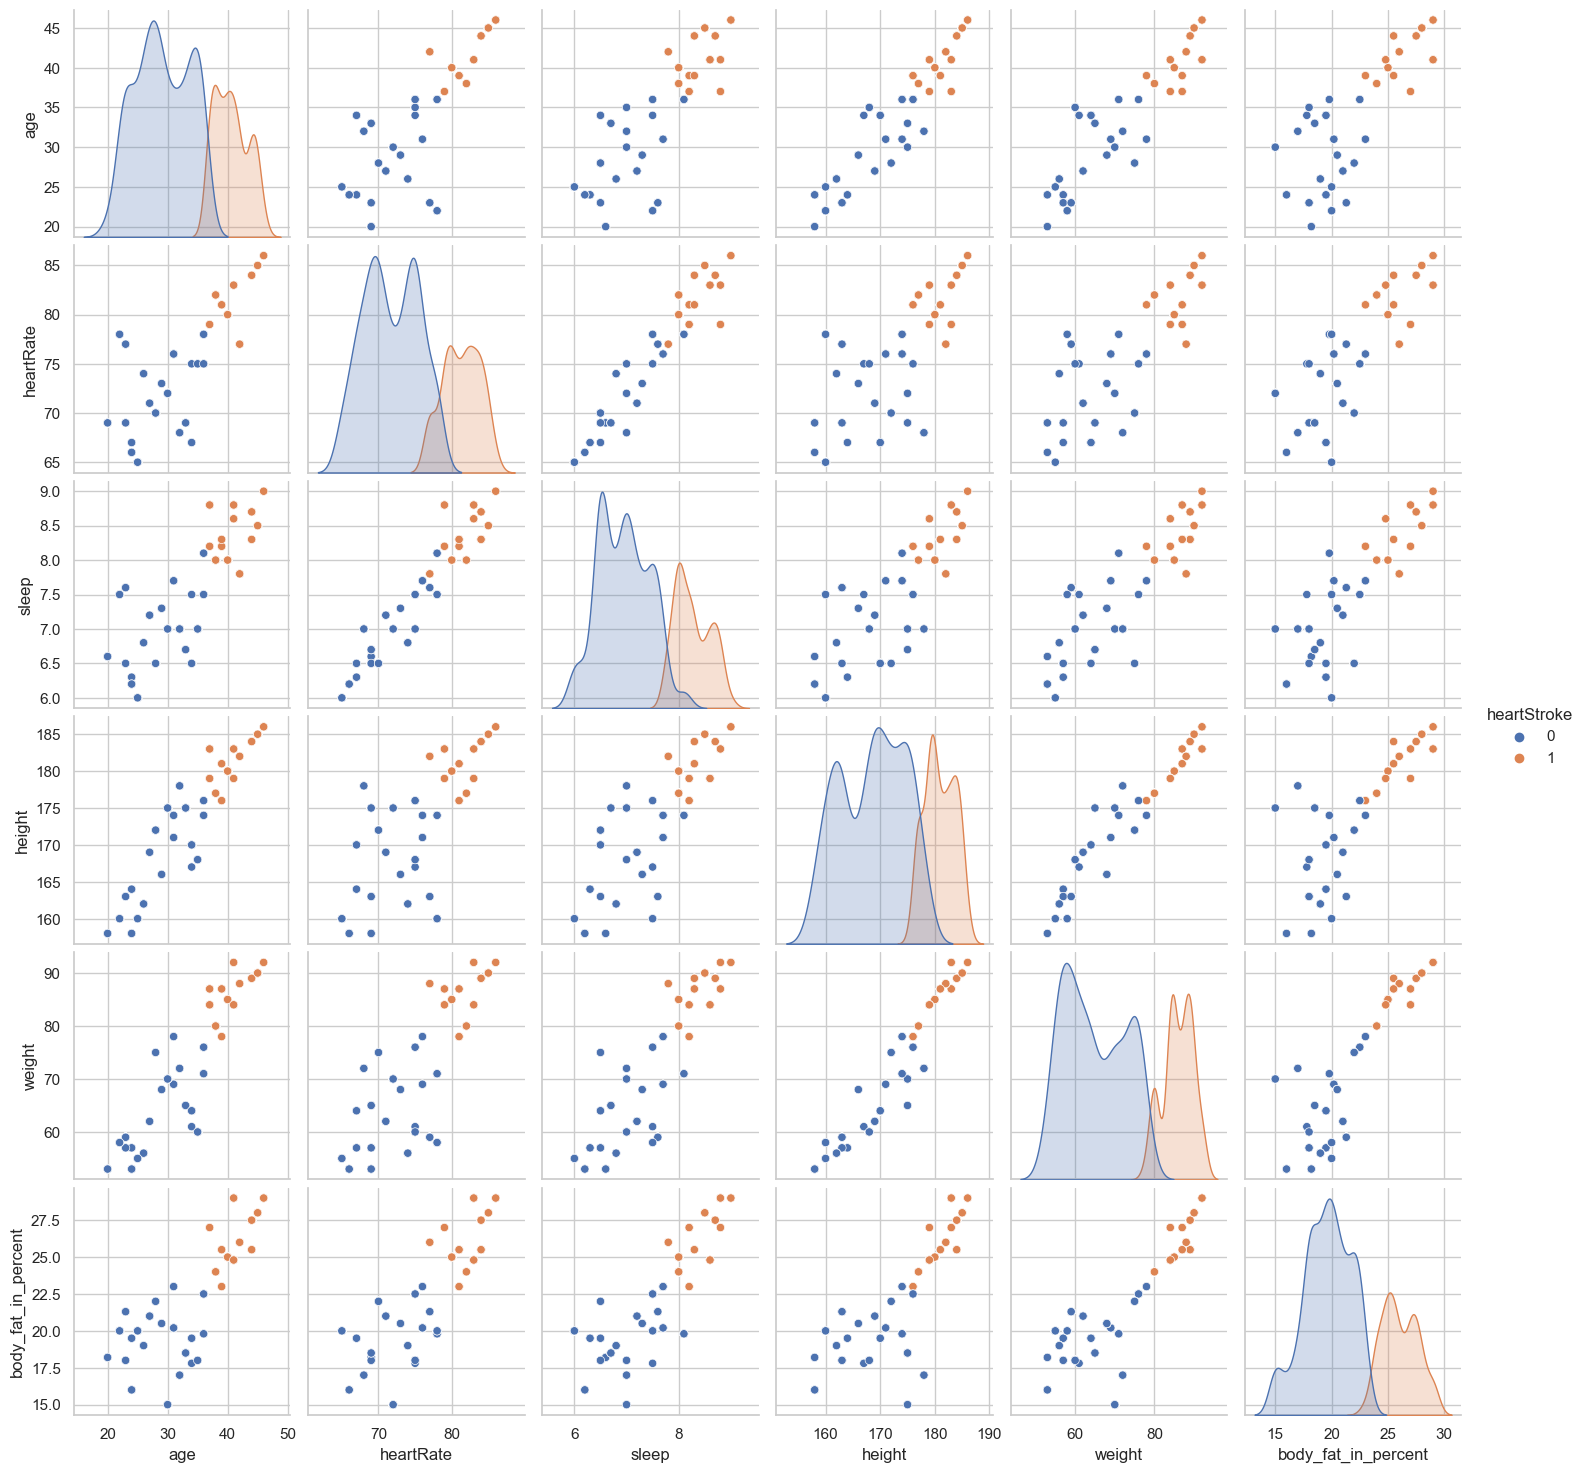

In [5]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='heartStroke', diag_kind='kde')
plt.show()

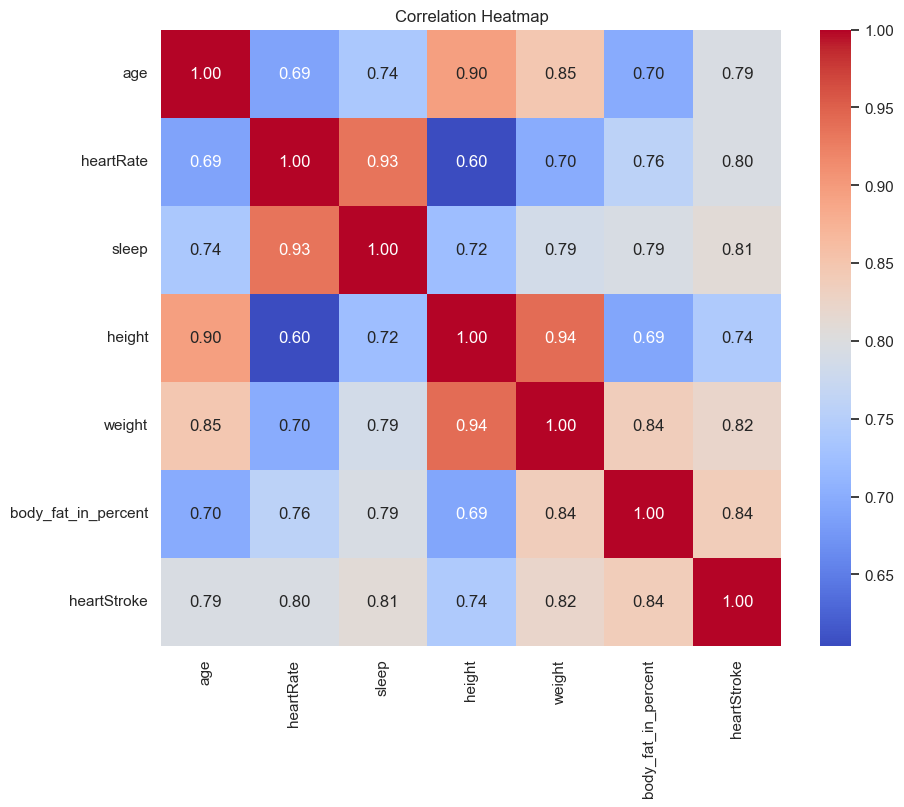

In [6]:
# Correlation heatmap to visualize the correlation between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

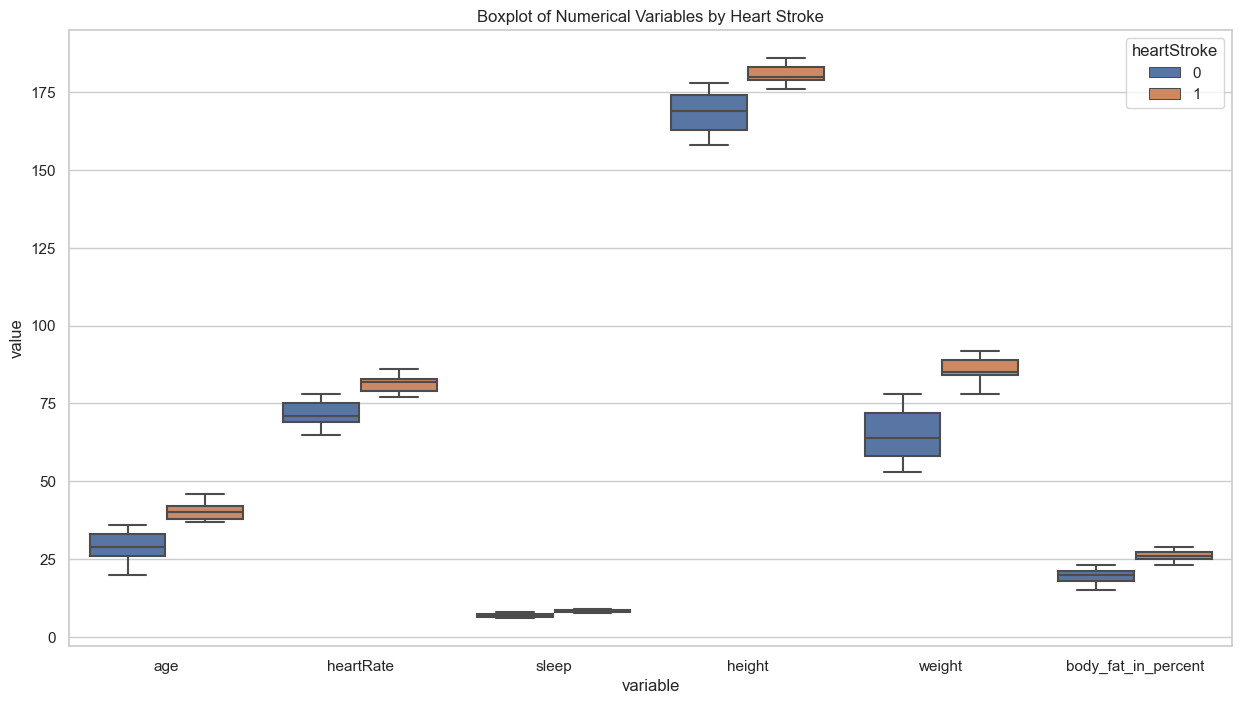

In [7]:
# Boxplot to visualize the distribution of numerical variables based on heartStroke
plt.figure(figsize=(15, 8))
sns.boxplot(x="variable", y="value", hue="heartStroke", data=pd.melt(df, id_vars="heartStroke"))
plt.title("Boxplot of Numerical Variables by Heart Stroke")
plt.show()

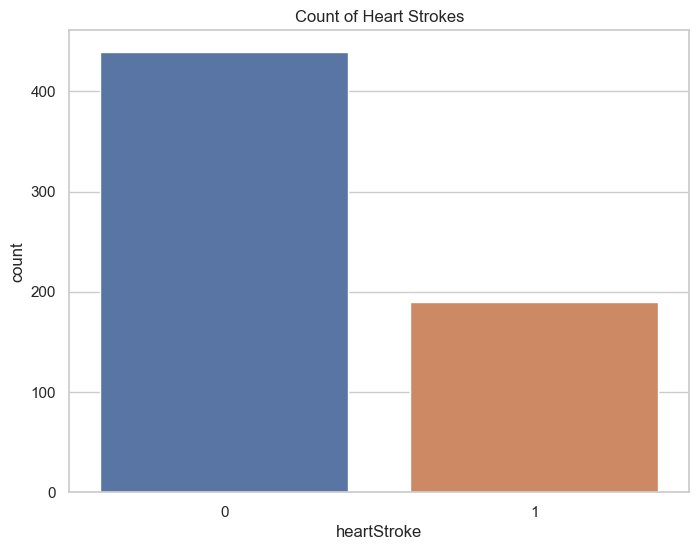

In [8]:
# Countplot for the target variable (heartStroke)
plt.figure(figsize=(8, 6))
sns.countplot(x='heartStroke', data=df)
plt.title("Count of Heart Strokes")
plt.show()

In [9]:
# Separate features (X) and target variable (y)
X = df.drop('heartStroke', axis=1)
y = df['heartStroke']

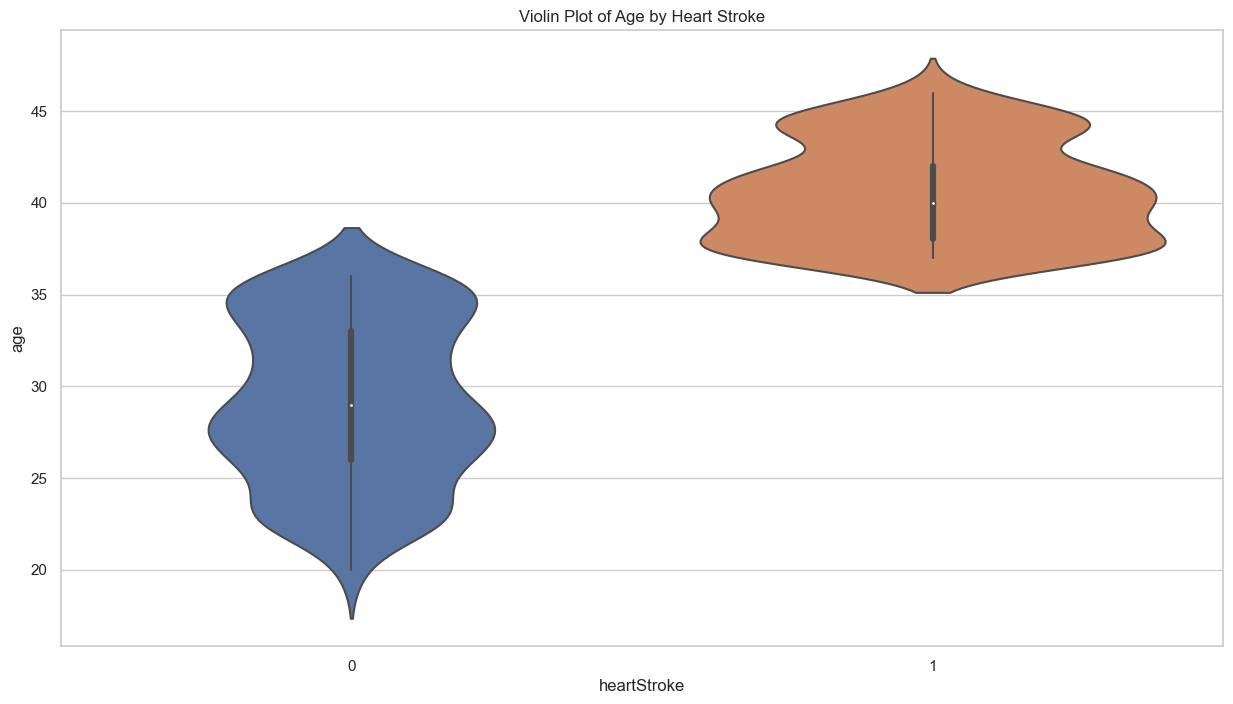

In [10]:
plt.figure(figsize=(15, 8))
sns.violinplot(x="heartStroke", y="age", data=df)
plt.title("Violin Plot of Age by Heart Stroke")
plt.show()

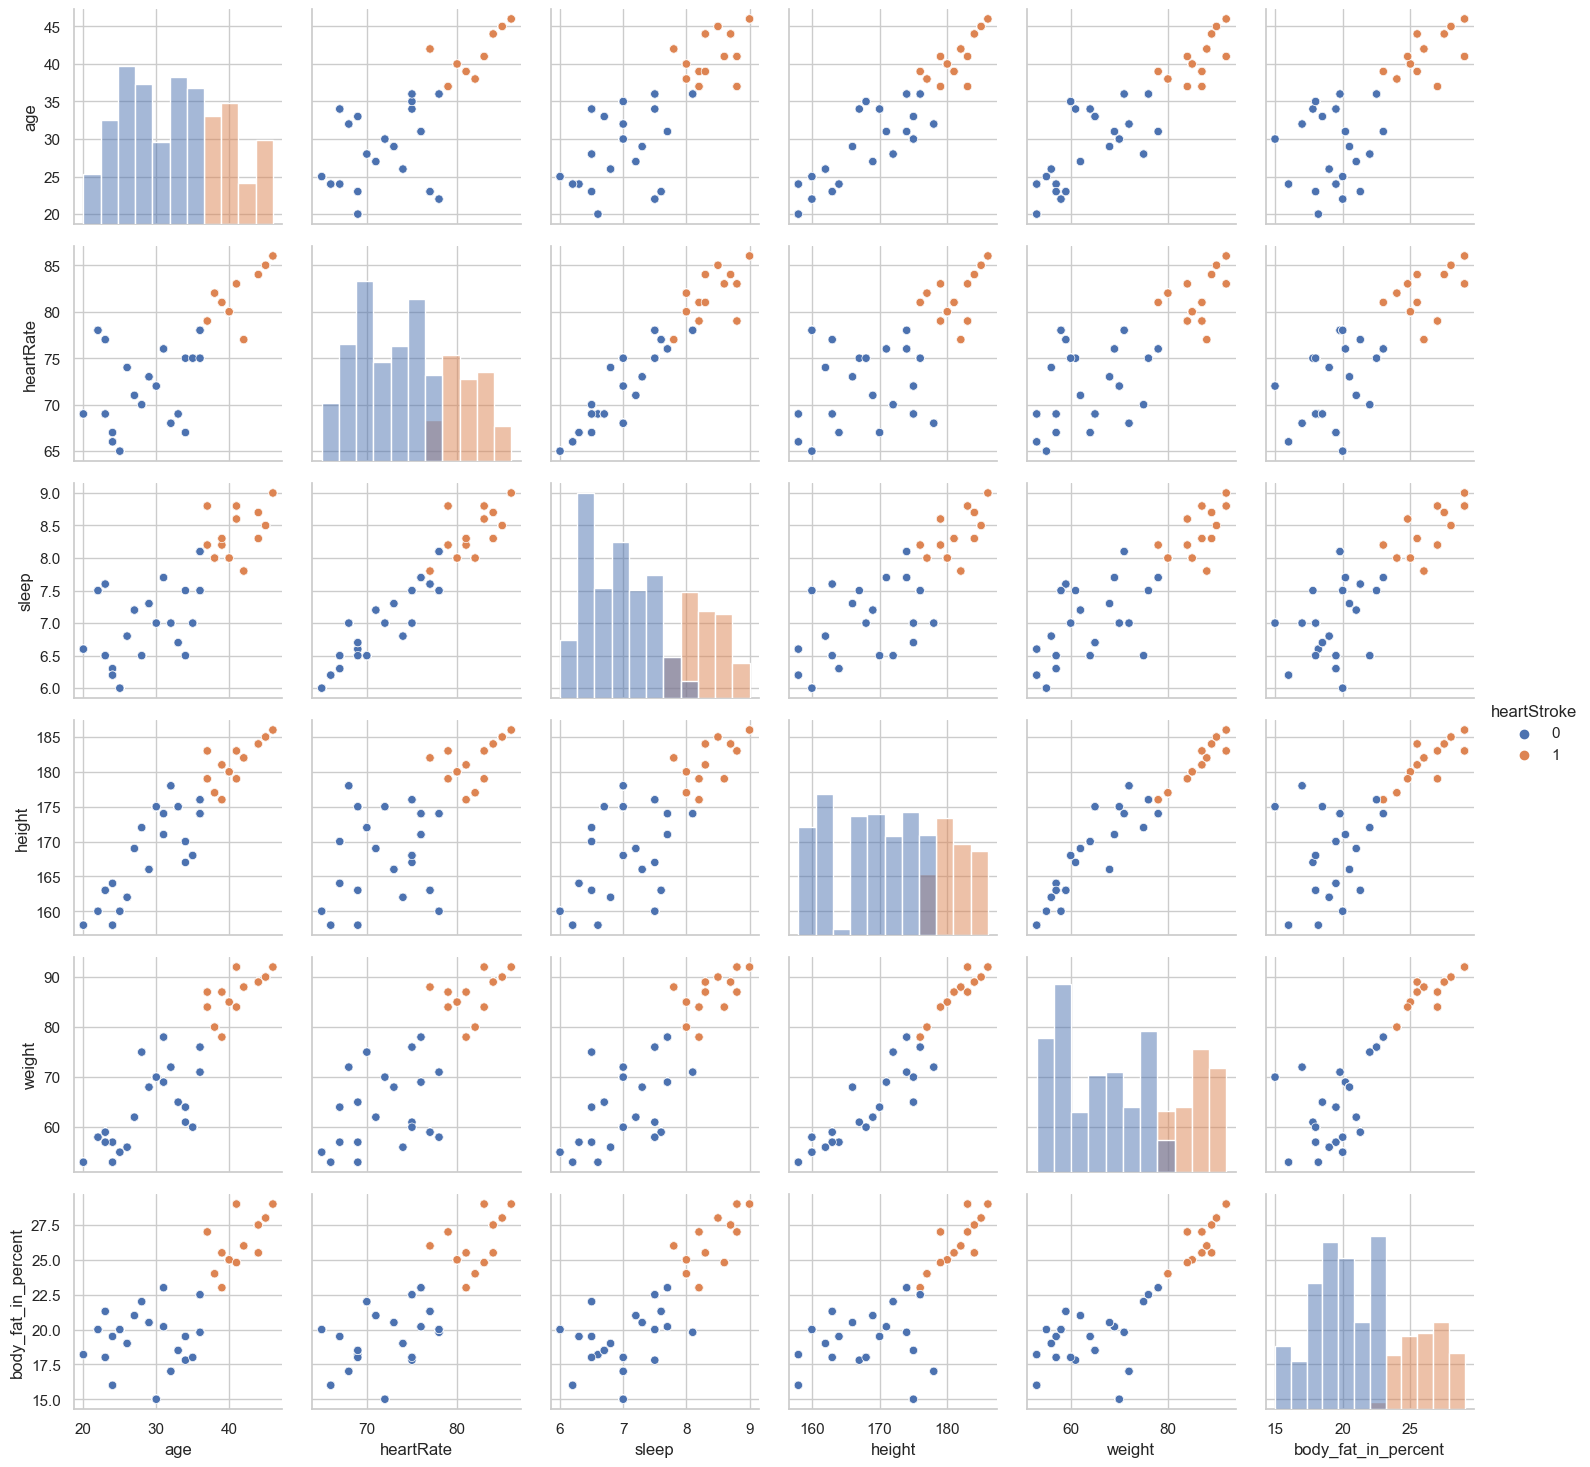

In [11]:
g = sns.PairGrid(df, hue="heartStroke")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

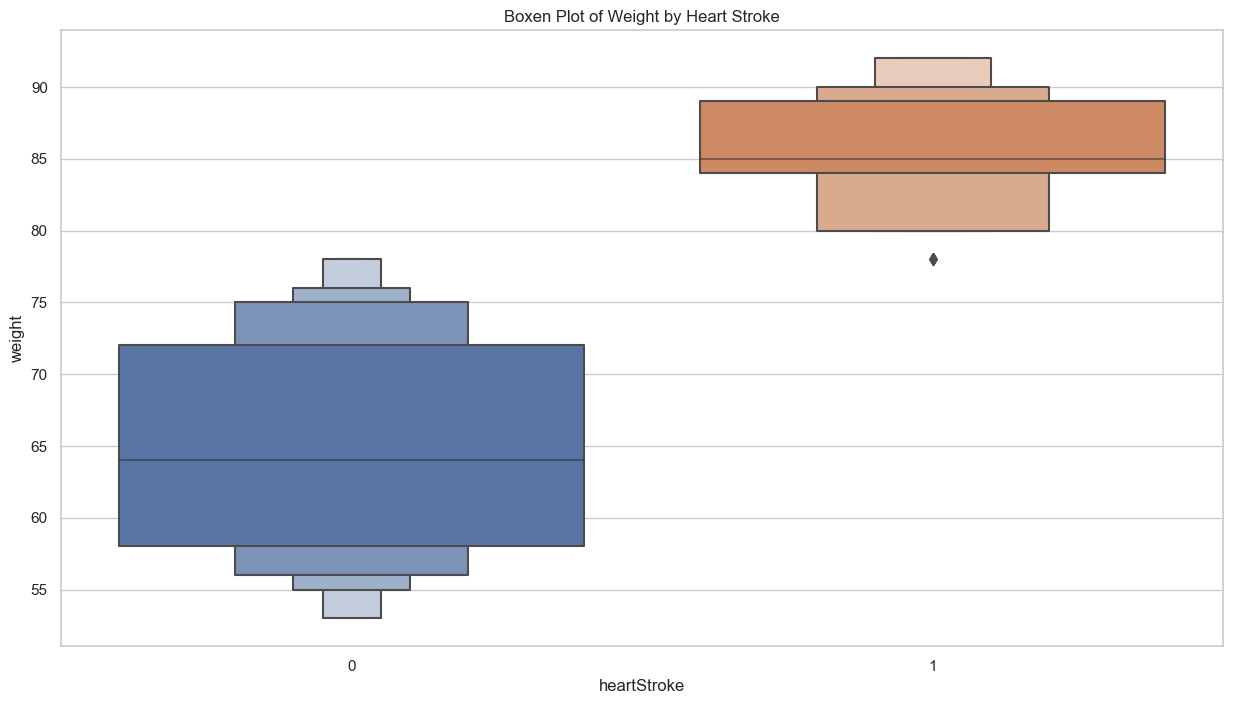

In [12]:
plt.figure(figsize=(15, 8))
sns.boxenplot(x="heartStroke", y="weight", data=df)
plt.title("Boxen Plot of Weight by Heart Stroke")
plt.show()

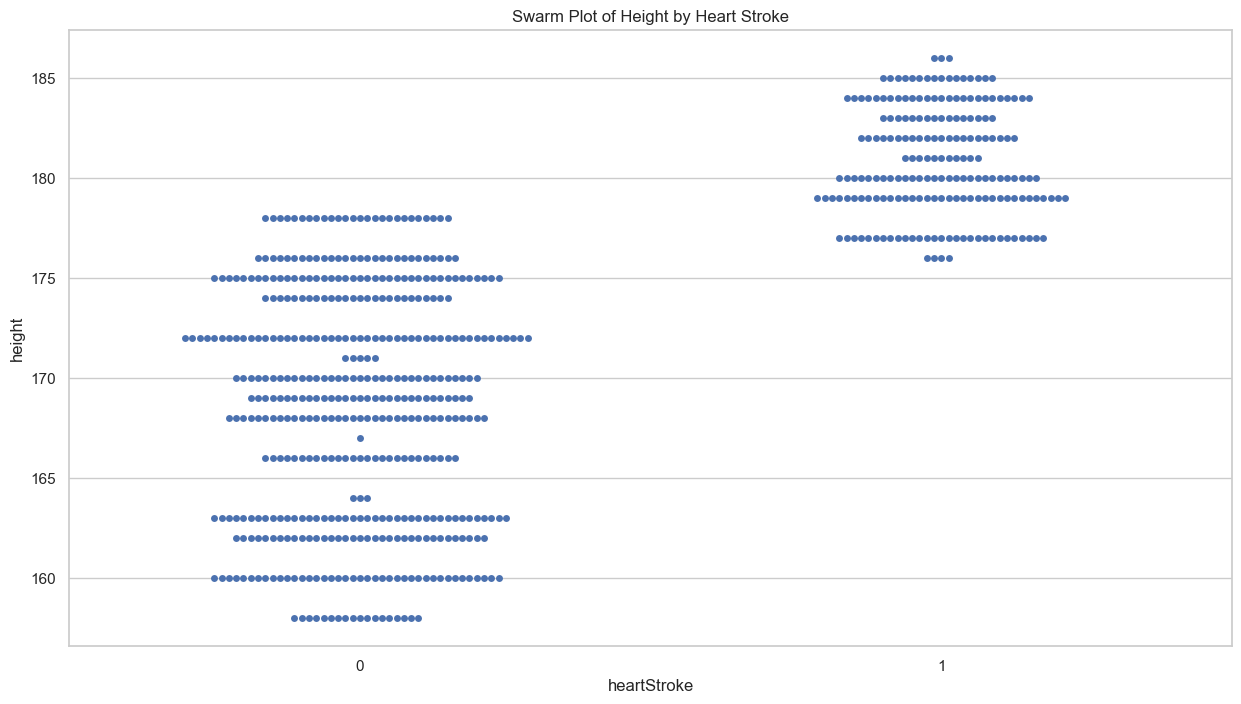

In [13]:
plt.figure(figsize=(15, 8))
sns.swarmplot(x="heartStroke", y="height", data=df)
plt.title("Swarm Plot of Height by Heart Stroke")
plt.show()

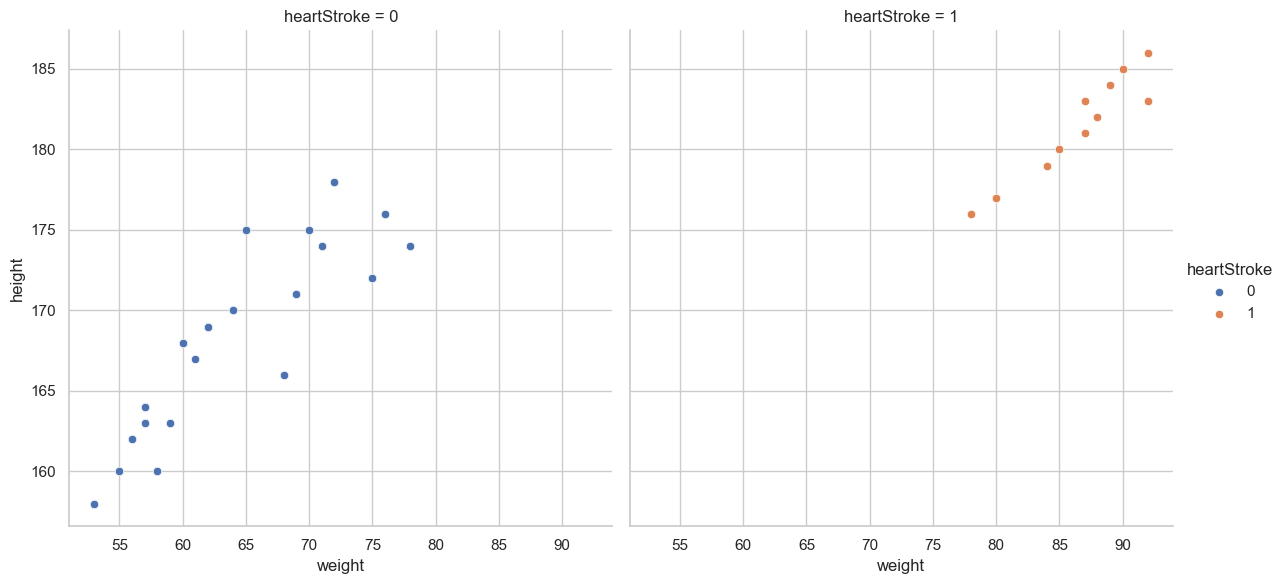

In [14]:
g = sns.FacetGrid(df, col="heartStroke", hue="heartStroke", height=6)
g.map(sns.scatterplot, "weight", "height")
g.add_legend()
plt.show()

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [31]:
import pickle

with open("rf.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

In [19]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.00

Confusion Matrix:
[[84  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        42

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create and train a simple neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the neural network model
_, accuracy_nn = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")


Epoch 1/8
16/16 [==============================] - 1s 12ms/step - loss: 0.9664 - accuracy: 0.5805 - val_loss: 0.6937 - val_accuracy: 0.6587
Epoch 2/8
16/16 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.6461 - val_loss: 0.5946 - val_accuracy: 0.5714
Epoch 3/8
16/16 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.6620 - val_loss: 0.5088 - val_accuracy: 0.6905
Epoch 4/8
16/16 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7376 - val_loss: 0.4617 - val_accuracy: 0.7540
Epoch 5/8
16/16 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.7893 - val_loss: 0.3897 - val_accuracy: 0.7857
Epoch 6/8
16/16 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8111 - val_loss: 0.3401 - val_accuracy: 0.9206
Epoch 7/8
16/16 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8509 - val_loss: 0.3134 - val_accuracy: 0.8651
Epoch 8/8
4/4 [===========

In [21]:
#SVM
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display the evaluation metrics for SVM
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Classification Report:")
print(classification_rep_svm)


SVM Accuracy: 1.00

SVM Confusion Matrix:
[[84  0]
 [ 0 42]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        42

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [22]:
#Gradient_Boosting
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Display the evaluation metrics for XGBoost
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nXGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("\nXGBoost Classification Report:")
print(classification_rep_xgb)


XGBoost Accuracy: 1.00

XGBoost Confusion Matrix:
[[84  0]
 [ 0 42]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        42

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.00

Confusion Matrix:
[[84  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        42

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
